# Module 6 - Featurization, Model Selection & Tuning.

## Introduction :
**Domain** : Material Manufacturing.

**Data Description** : Concrete is the most important material in civil engineering.This dataset contains
The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

**Problem Statement** : Modeling of strength of high performance concrete using Machine Learning .

**Attribute Information** :  
● **Cement**    : measured in  kg in a m3 mixture 
 
 ● **Slag**     : measured in  kg in a m3 mixture 
 
 ● **Fly ash**     : measured in  kg in a m3 mixture 
 
 ● **Water**     : measured in  kg in a m3 mixture 
 
 ● **Superplasticizer**   : measured in  kg in a m3 mixture 
 
 ● **Coarse Aggregate**   : measured in  kg in a m3 mixture
 
 ● **Fine Aggregate**   : measured in  kg in a m3 mixture
 
 ● **Age**     : day (1~365)
 
 ● **Strength** :  compressive strength measured in MPa 


In [525]:
#Importing Necessary libraries

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

#Importing Numerical Libraries
import numpy as np

#To handle data in form of rows and columns
import pandas as pd

#To enable plotting graphs in jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

#Importig library for statistical graphs
import seaborn as sns

#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split


#Statistical library
from scipy.stats import norm

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso


In [526]:
#sklearn package for gridsearchcv
from sklearn.model_selection import GridSearchCV

In [527]:
from sklearn import metrics

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVR


### **Deliverable-1  (Exploratory data quality report reflecting the following)**
### - **a.Univariate analysis:** 
   
###   **Univariate analysis includes data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers**


### - **b.Multivariate analysis :** 
   
  
### **Bi-variate analysis between the predictor variables and between the predictor variables and target column.
### Comment on your  findings in terms of their relationship and degree of relation if any. 
### Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes** 



### - **c. Strategies to address the different data challenges such as data pollution, outliers and missing values**

In [528]:
#Importing dataset using pandas dataframe function

concrete_df = pd.read_csv("concrete.csv")

In [529]:
#let's have a look of first few rows

concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [530]:
#Datatype of each feature

concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB



**Description - All attributes in the dataset are of Numerical type ,so there is no need of any conversion.**


In [531]:
#Number of observations and Features

concrete_df.shape

(1030, 9)

**Description - There are 1030 observations and 9 features which include 8 independent variables and 1 target variable.**

In [532]:
#five pont summary by using describe function

concrete_df.describe(include = 'all' ).transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Checking the presence of missing values :**

In [533]:
#checking the prescence of missingvalues
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**Description - As we can see by the above output there is no missing values.**

### a)Univariate Analysis:

**Checking the presence of outliers And distribution of data in each variable : Using Boxplot for outliers, Distplot and histogram for data distribution**

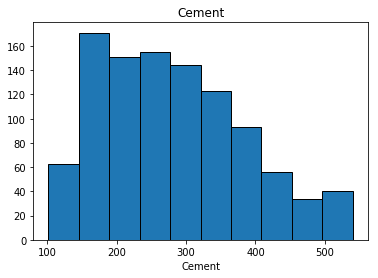

In [534]:
##frequency distribution of income
plt.hist(concrete_df.cement,  edgecolor='black')
plt.title('Cement')
plt.xlabel('Cement')
plt.show()

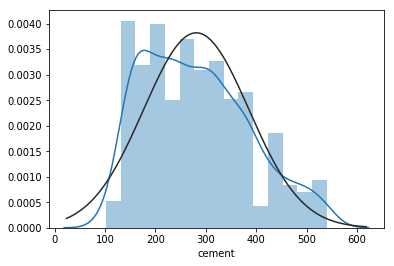

In [535]:
#seaborn distplot for cement ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['cement'] ,fit = norm)

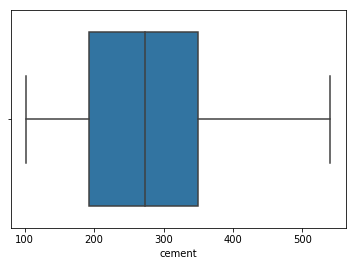

In [536]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['cement'])

**Description - No outliers exist.**
**The distribution of cement in the given dataset looks close to a uniform distribution.**

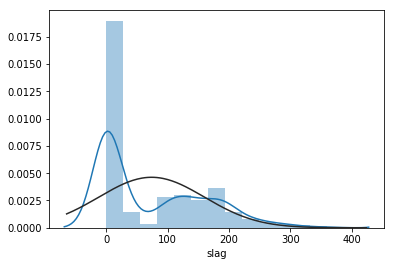

In [537]:
##seaborn distplot for slag ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['slag'],fit = norm)

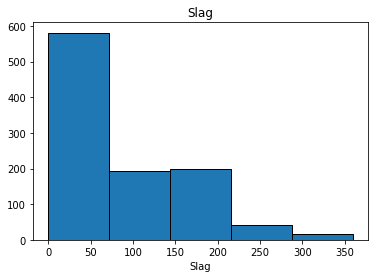

In [538]:
##frequency distribution of slag

plt.hist(concrete_df.slag, 5, edgecolor='black')
plt.title('Slag')
plt.xlabel('Slag')
plt.show()

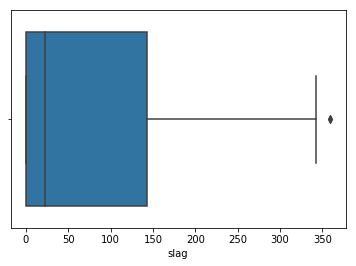

In [539]:
#checking Outliers in the column  using boxplot
sns.boxplot(concrete_df['slag'])

**The distribution of slag in the given dataset looks highly right-skewed. Hence there might arise a need to remove outlier rows based on this feature. The same inference can also be made from the boxplot shown below.**

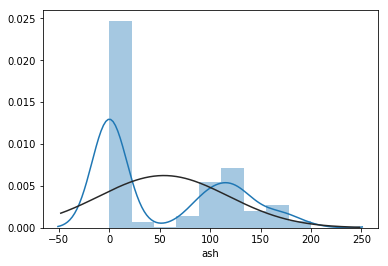

In [540]:
##seaborn distplot for ash ,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['ash'],fit = norm)

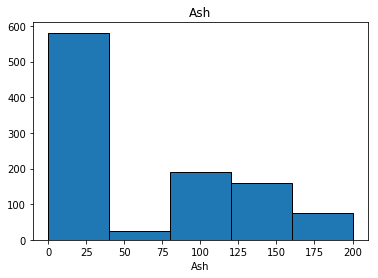

In [541]:
##frequency distribution of ash

plt.hist(concrete_df.ash, 5, edgecolor='black')
plt.title('Ash')
plt.xlabel('Ash')
plt.show()

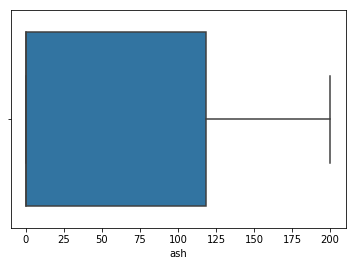

In [542]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['ash'])

**Description -** 

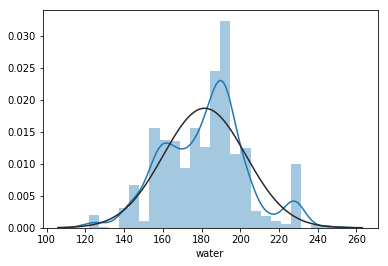

In [543]:
##seaborn distplot for water,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['water'],fit = norm)

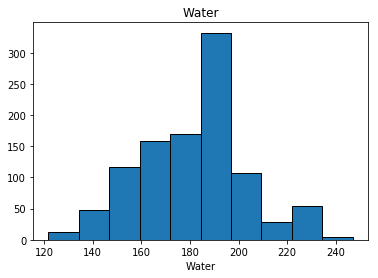

In [544]:
##frequency distribution of water

plt.hist(concrete_df.water, edgecolor='black')
plt.title('Water')
plt.xlabel('Water')
plt.show()

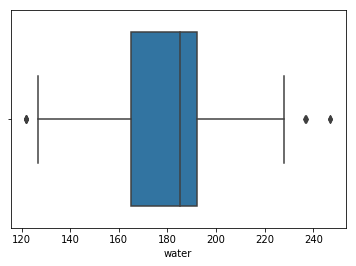

In [545]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['water'])

**Description -The distribution of water in the given dataset looks close to a uniform distribution. Indicating outliers in both the higher and lower direction**

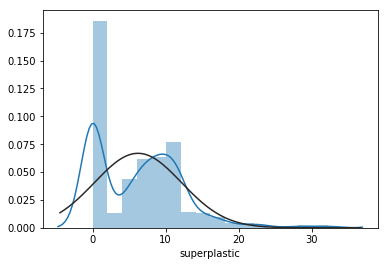

In [546]:
##seaborn distplot for superplastic,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['superplastic'],fit = norm)

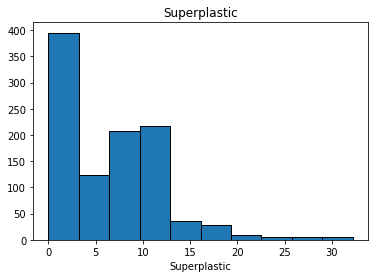

In [547]:
##frequency distribution of superplastic

plt.hist(concrete_df.superplastic, edgecolor='black')
plt.title('Superplastic')
plt.xlabel('Superplastic')
plt.show()

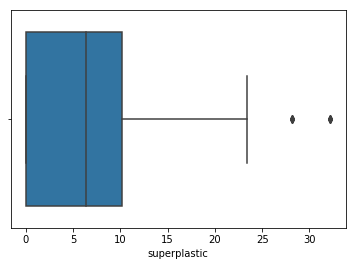

In [548]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['superplastic'])

**Description : There exist few outliers in the right tailThe 'superplastic' variable is highly right skewed in the given dataset, which is evident from the boxplot above & the frequency distribution.**

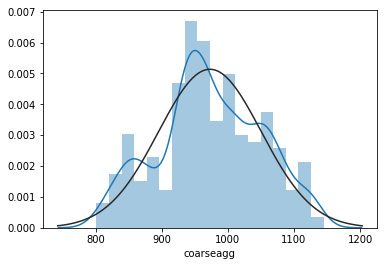

In [549]:
##seaborn distplot for coarseagg,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['coarseagg'],fit = norm)

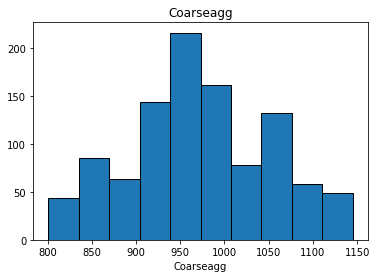

In [550]:
#frequency distribution of coarseagg

plt.hist(concrete_df.coarseagg, edgecolor='black')
plt.title('Coarseagg')
plt.xlabel('Coarseagg')
plt.show()

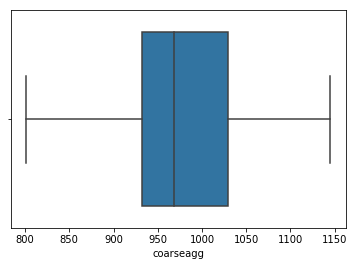

In [551]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['coarseagg'])

**Description : No outliers exist .The distribution of 'coarseagg' in the given dataset looks close to a uniform distribution**

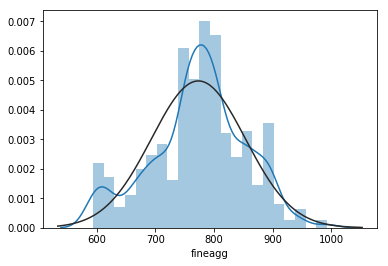

In [552]:
##seaborn distplot for fineagg,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['fineagg'],fit = norm)

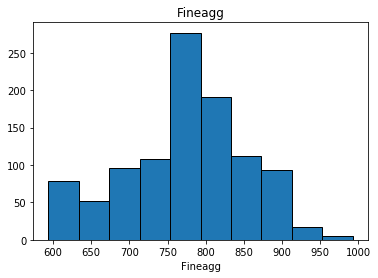

In [553]:
##frequency distribution of fineagg

plt.hist(concrete_df.fineagg, edgecolor='black')
plt.title('Fineagg')
plt.xlabel('Fineagg')
plt.show()

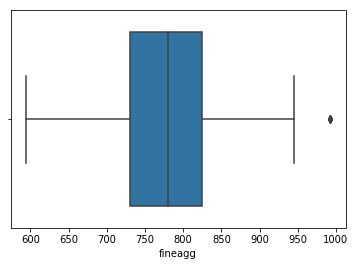

In [554]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['fineagg'])

**Description : An outlier exist .The distribution of 'Fineagg' in the given dataset looks close to a uniform distribution**

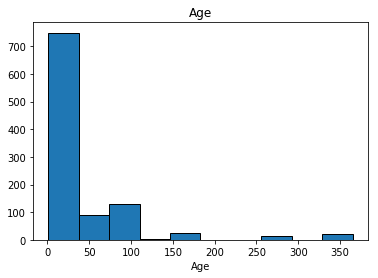

In [555]:
##frequency distribution of age

plt.hist(concrete_df.age, edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.show()

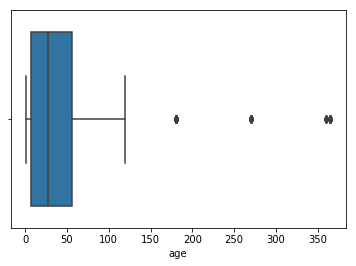

In [556]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['age'])

**Description : There exist few outliers in the right tail.The 'age' variable is highly right skewed in the given dataset, which is evident from the boxplot above & the frequency distribution.**

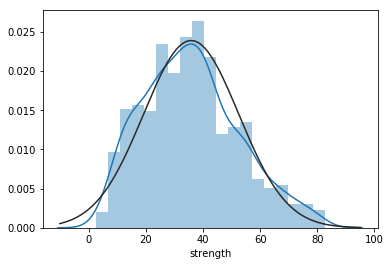

In [557]:
##seaborn distplot for Strength,where the black line highlighting the possible  normal distribution curve.

sns.distplot(concrete_df['strength'],fit = norm)

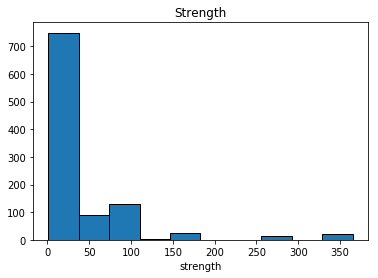

In [558]:
##frequency distribution of 'strength'

plt.hist(concrete_df.age, edgecolor='black')
plt.title('Strength')
plt.xlabel('strength')
plt.show()

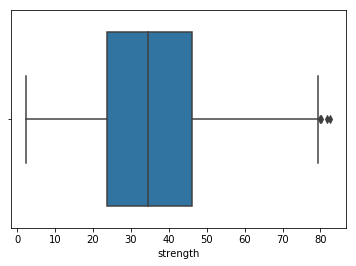

In [559]:
#checking Outliers in the column  using boxplot

sns.boxplot(concrete_df['strength'])

**Description : Few outlier exists in the right tail .The distribution of 'Strength' in the given is normal distribution.**

### Bivariate Analysis:

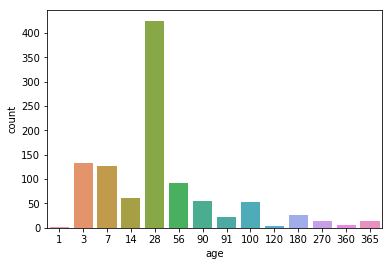

In [560]:
#Count the age .
sns.countplot(concrete_df['age'])

**Description- Maximum age of a concrete in the dataset is 365 days ,there are 14 observations which falls under this category.
whereas minimum age of a concrete is 1 day,there are 2 observations which belongs to this category(strength is 12.64 and 6.27
respectively).**
**Highest number of observations(425) belongs to age of 28 days where strength of those concrete are in the range between 8.54 and 81.75.**

### Use correlation method to observe the relationship between different variables.

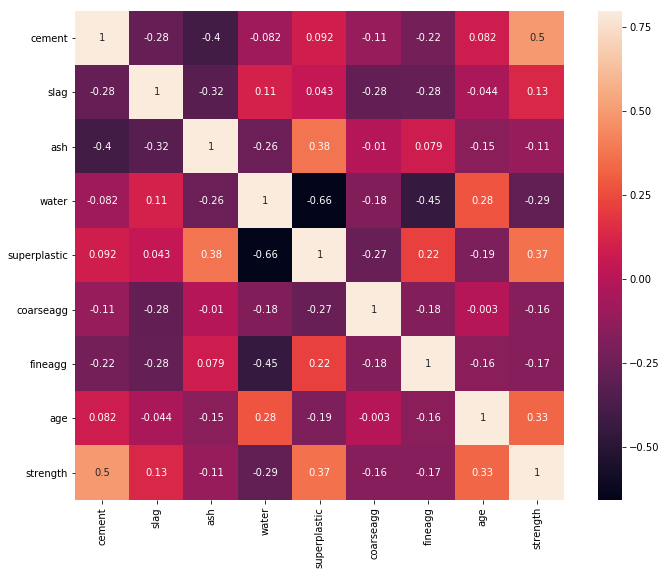

In [561]:
#correlation Matrix and Heatmap 

corr = concrete_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr,annot = True ,vmax = 0.8,square = True)
plt.show()

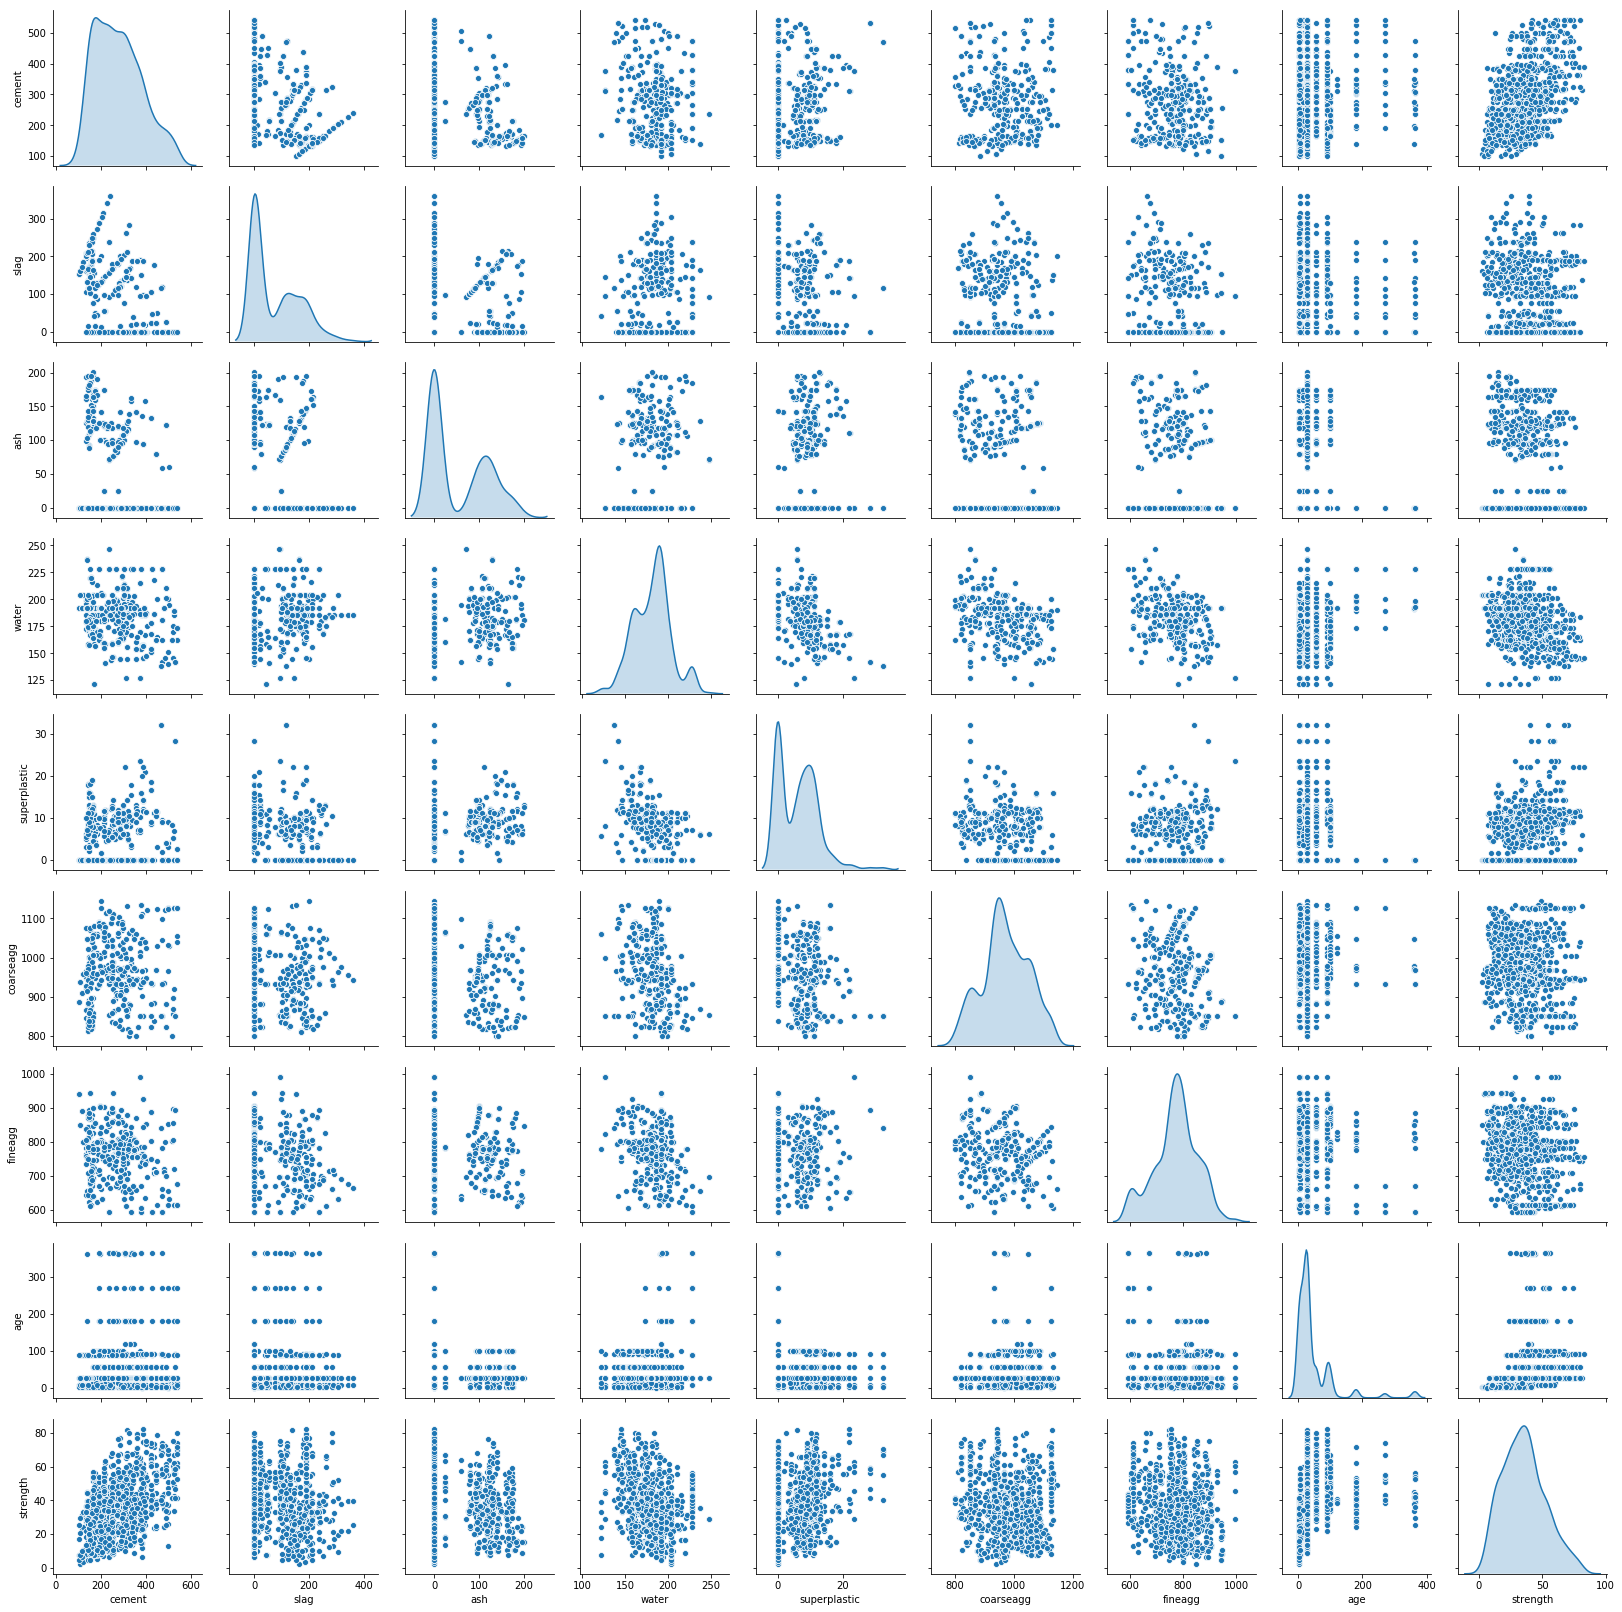

In [562]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(concrete_df,diag_kind ='kde')

**Above plots indicating Positive correlation between strengh and cement.**

**c) Strategies to address the different data challenges such as data pollution, outliers and missing values**

In [563]:
#Let's print the median of each column


concrete_df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [564]:
#copying the original dataframe into new dataframe named concrete_df_no_out

concrete_df_new = concrete_df

In [565]:
#Replacing outlier in the column 'slag' with Max quartile value of that column.

concrete_df_new['slag'] = np.where(concrete_df_new['slag']>142.950,142.950,concrete_df_new['slag'])

In [566]:
#Replacing outlier in the column water with 'median' value of that column.

concrete_df_new['water'] = np.where(concrete_df_new['water']>192,185,concrete_df_new['water'])

#concrete_df_new['water'] = np.where(concrete_df_new['water']<121.80,185,concrete_df_new['water'])

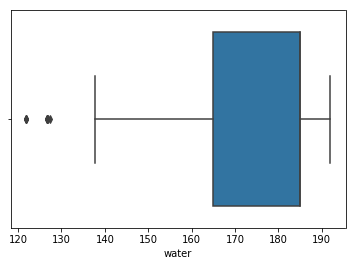

In [567]:
sns.boxplot(concrete_df_new['water'])

In [568]:
concrete_df_new['water'].describe().T

count    1030.000000
mean      176.019903
std        14.788609
min       121.800000
25%       164.900000
50%       185.000000
75%       185.000000
max       192.000000
Name: water, dtype: float64

In [569]:
#Replacing outlier in 'superplastic' with median value of that column.


concrete_df_new['superplastic'] = np.where(concrete_df_new['superplastic']>10.200,6.400,concrete_df_new['superplastic'])

In [570]:
##Replacing outlier in 'age' with median value of that column.

concrete_df_new['age'] = np.where(concrete_df_new['age']>56,28,concrete_df_new['age'])

In [571]:
#Deleting the outlier observations of 'fineagg' column and 'water' column.
a = concrete_df_new["fineagg"].quantile(0.25)
b = concrete_df_new["fineagg"].quantile(0.75)
IQR1 = b-a

df_no_out1 = concrete_df_new[~((concrete_df_new["fineagg"] < (a - 1.5 * IQR1)) |(concrete_df_new["fineagg"] > (b + 1.5 * IQR1)))]


c = concrete_df_new["water"].quantile(0.25)
d = concrete_df_new["water"].quantile(0.75)
IQR1 = d-c

df_no_out2 = concrete_df_new[~((concrete_df_new["water"] < (c - 1.5 * IQR1)) |(concrete_df_new["water"] > (d + 1.5 * IQR1)))]




print(df_no_out1.shape)
print(df_no_out2.shape)

(1025, 9)
(1018, 9)


[Text(0, 0, 'cement'),
 Text(0, 0, 'slag'),
 Text(0, 0, 'ash'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplastic'),
 Text(0, 0, 'coarseagg'),
 Text(0, 0, 'fineagg'),
 Text(0, 0, 'age'),
 Text(0, 0, 'strength')]

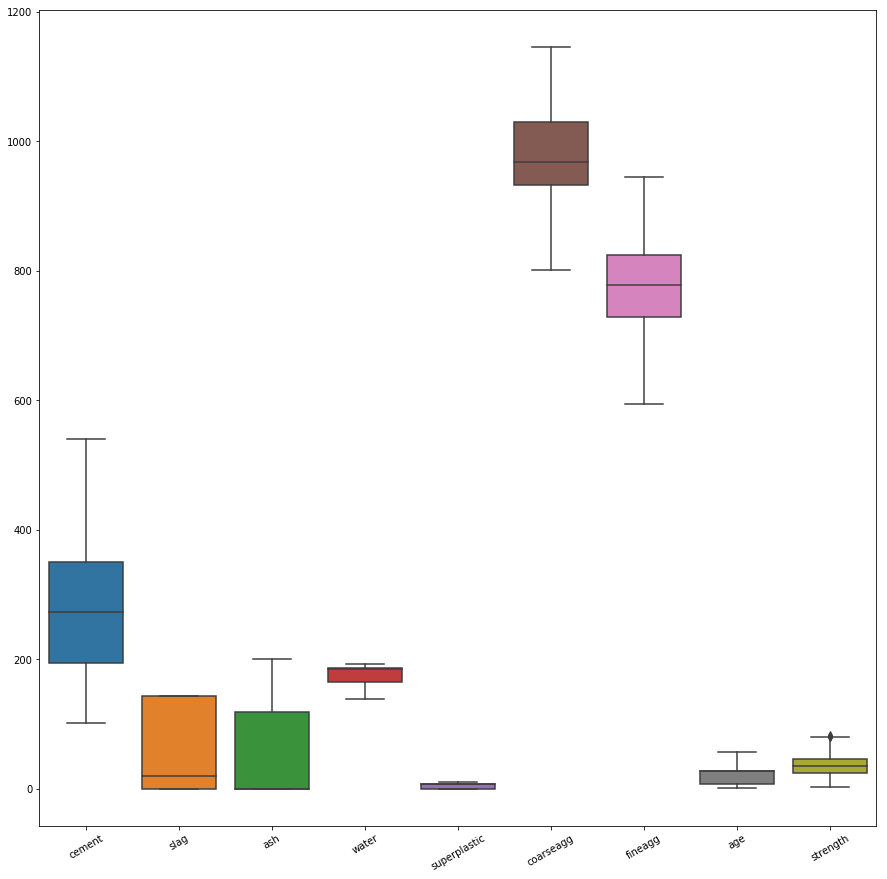

In [573]:
#combine boxplot after outlier treatment

plt.figure(figsize = (15,15))
ax = sns.boxplot(data = df_no_out2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

### Treatment of Outliers :
**Approach 1- Drop all the rows containing outliers** - which deletes 84 observations.

**Approach 2 - Replace outlier with quartile values (0.75,median)
**Description - I have applied both the approaches in this notebook beacause if we would apply only approach 1 there might be loss of huge data which we cannot afford as the observations are only 1030.
There are outliers in column slag ,water ,fineagg,superplatic and age.**

- Slag has outliers only in the higher side of distribution , the minimum value is 0 whereas mean is **73.89** , median is **22** ,max is **359.4** and quartile (0.75) is **142.95** . So there is a huge difference between median and the outlier value. so it would be a good idea to replace those outlier values with quartile(0.75).


- Water has outliers in both higher and lower distribution , so  first i have applied approach 2 for higher distribution side i.e replacing  outlier values with the median and then applied approach 1 for lower distribution .



- age has outliers in the higher distribution side only and i have replaced it with median. 


- superplastic has outliers in the higher distribution side only and i have replaced it with median.

- fineagg has very few outliers so its a good practice to drop those.

By following both the approaches we have drop only **12** observations .




### 2. Deliverable -2  (Feature Engineering techniques)
### a. Identify opportunities (if any) to create a composite feature, drop a feature**

### **b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help.** 

### **c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.** 

In [575]:
#copy all predictors variables to dataframe X ,since strength is dependent variable(target) drop it. 
X =  df_no_out2.drop('strength',axis = 1)

#copy the ' strength 'column to dataframe y. This is the target column
y =  df_no_out2['strength']

In [576]:
#splitting the dataset into training and test 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.30,random_state = 1)


**Simple Linear model**

In [577]:
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), (('Linr', LinearRegression()))]) 
pipe_lr.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Linr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [578]:
y_pred = pipe_lr.predict(X_test)

In [579]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# calculate MAE, MSE, R

mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

8.198118516588325
The Root Mean Sq Error is 8.198118516588325 and R^2 error is 0.7511076960945048


**Very poor performance , so it is clear from the above results simple linear model cannot give an optimul model**

**Lasso Model:**

In [580]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [582]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model


Lasso model: [ 9.24683217  5.12349458  0.29500785 -4.0316319   1.16575116  0.
 -0.54951409  8.50546982]


coefficients of features **ash,coarseagg ,fineagg** have become zero and **superplastic** also has very less value.**
So these are the features which are contributing very less for the given target variable.**

In [583]:
y_pred1 = lasso.predict(X_test)

In [584]:
print(sqrt(mean_squared_error(y_test, y_pred1)))

8.246574603769071


### Polynomial Model with degree 4:

In [585]:
#poly = PolynomialFeatures(4)
pipe_lr3 = Pipeline([('scl', StandardScaler()), (('poly4' ,PolynomialFeatures(degree = 4, interaction_only=True)))]) 
pipe_lr3.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly4', PolynomialFeatures(degree=4, include_bias=True, interaction_only=True))])

In [586]:
Reg_model_poly4 = LinearRegression()
Reg_model_poly4.fit(X_train,y_train)
print(Reg_model_poly.coef_)

[ 4.37462038e-16  1.29578378e+01  7.54279410e+00  2.69977611e+00
 -2.55612006e+00  1.04313357e+00  1.40607797e+00  1.93635316e+00
  9.14876306e+00 -1.19763789e+00  2.83059995e-01  4.58741793e-01
  2.97892692e+00  1.45152598e+00  1.37225524e+00  2.21281484e-03
 -5.05121710e-01 -5.74352094e-01  1.93642884e+00 -3.79397083e-01
  1.16813726e+00  1.65691366e+00 -1.48528633e-01  2.02213636e+00
  1.03817322e+00  2.67947168e+00  4.48119710e-01  9.10972821e-01
 -1.05113105e+00 -7.81933064e-02  1.34504202e-01  1.94117792e+00
  6.33437392e-01 -1.46966571e+00  1.31630094e+00 -4.71182387e-02
  8.29119630e-02]


In [587]:
print(Reg_model_poly.score(X_train1, y_train1))

0.769110194638251


In [588]:
y_pred3 = pipe_lr2.predict(X_test)

In [589]:
print(sqrt(mean_squared_error(y_test, y_pred3)))

20.38115924790117


In [590]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8.198118516588325


**DecisionTreeRegressor:**

In [591]:
#pipeline 4 for Decsion tree regressor 
from sklearn.tree import DecisionTreeRegressor
pipe_lr4 = Pipeline([('scl', StandardScaler()), (('dtr', DecisionTreeRegressor()))])

pipe_lr4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtr', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])

In [592]:
y_pred4 = pipe_lr4.predict(X_test)

In [593]:
y_pred_train = pipe_lr4.predict(X_train)

In [594]:
mean_squared_error(y_train, y_pred_train)

6.764381104868915

In [56]:
print(Regression_model.score(X_train, y_train))

0.7262369867890105


In [183]:
print(lasso.score(X_train, y_train))

0.7257020144454951


**Very poor performance , so it is clear from the above results simple linear model cannot give an optimul model**

#### **b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help.** 

**polynomial model: Let us generate polynomial models reflecting the non-linear interaction between some dimensions . Here we are applying degree of 2,3,4**.

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly1 = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [248]:

X_poly = poly1.fit_transform(X_scaled)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(712, 8)

In [249]:
Reg_model_poly = LinearRegression()
Reg_model_poly.fit(X_train1,y_train1)
print(Reg_model_poly.coef_)

[ 4.37462038e-16  1.29578378e+01  7.54279410e+00  2.69977611e+00
 -2.55612006e+00  1.04313357e+00  1.40607797e+00  1.93635316e+00
  9.14876306e+00 -1.19763789e+00  2.83059995e-01  4.58741793e-01
  2.97892692e+00  1.45152598e+00  1.37225524e+00  2.21281484e-03
 -5.05121710e-01 -5.74352094e-01  1.93642884e+00 -3.79397083e-01
  1.16813726e+00  1.65691366e+00 -1.48528633e-01  2.02213636e+00
  1.03817322e+00  2.67947168e+00  4.48119710e-01  9.10972821e-01
 -1.05113105e+00 -7.81933064e-02  1.34504202e-01  1.94117792e+00
  6.33437392e-01 -1.46966571e+00  1.31630094e+00 -4.71182387e-02
  8.29119630e-02]


In [250]:
print(Reg_model_poly.score(X_train1, y_train1))

0.769110194638251


In [251]:
#polynomial with degree 3

poly3 = PolynomialFeatures(degree = 3, interaction_only=True)

In [252]:
X_poly3 = poly3.fit_transform(X_scaled)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly3, y, test_size=0.30, random_state=1)
X_train.shape

(712, 8)

In [253]:
Reg_model_poly3 = LinearRegression()
Reg_model_poly3.fit(X_train2,y_train2)
print(Reg_model_poly3.coef_)

[ 6.49363172e-16  1.14202794e+01  7.24167687e+00  2.95237374e+00
 -4.83291683e-01  6.99932208e-01  2.58778162e+00  3.40160959e+00
  6.93674629e+00 -1.98988835e+00 -8.43698965e-01 -2.57306061e+00
  5.27078453e-01  1.43168198e+00  1.04344508e+00  1.61847346e+00
  3.23200406e-01 -4.12525006e+00 -2.67318049e+00 -1.63898204e+00
  9.43467705e-01  2.87678528e+00 -1.72258140e+00 -1.74275130e+00
  5.90325952e-01  1.17596322e+00  6.47318122e-01 -3.60710053e+00
 -3.76459501e+00 -1.99050149e+00  1.16980941e+00 -8.09895286e-01
 -1.07758995e+00 -4.98882214e-01  2.02428134e+00  5.16438718e-01
  1.62627013e+00 -1.41248786e+00  1.00580106e+00 -1.36078272e+00
 -1.74349944e+00  1.44376988e-01 -2.50261339e+00  2.08343243e+00
  5.62340788e-01 -3.36665050e-01 -8.39019722e-01  4.43619212e-01
  4.75360446e+00 -1.80602384e+00 -2.81352238e+00 -1.25710362e-01
 -1.71859055e+00 -2.35414047e+00 -9.28640392e-01 -1.79311409e+00
  1.05490299e-01  5.24924125e-01  1.20675060e+00 -1.23491595e+00
  4.37960253e-01  2.97669

In [254]:
print(Reg_model_poly3.score(X_train2, y_train2))

0.8160728925251619


In [255]:

poly4 = PolynomialFeatures(degree = 4, interaction_only=True)

#poly = PolynomialFeatures(4)

In [256]:
X_poly4 = poly4.fit_transform(X_scaled)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_poly4, y, test_size=0.30, random_state=1)
X_train3.shape

(712, 163)

In [257]:
Reg_model_poly4 = LinearRegression()
Reg_model_poly4.fit(X_train3,y_train3)
print(Reg_model_poly.coef_)

[ 4.37462038e-16  1.29578378e+01  7.54279410e+00  2.69977611e+00
 -2.55612006e+00  1.04313357e+00  1.40607797e+00  1.93635316e+00
  9.14876306e+00 -1.19763789e+00  2.83059995e-01  4.58741793e-01
  2.97892692e+00  1.45152598e+00  1.37225524e+00  2.21281484e-03
 -5.05121710e-01 -5.74352094e-01  1.93642884e+00 -3.79397083e-01
  1.16813726e+00  1.65691366e+00 -1.48528633e-01  2.02213636e+00
  1.03817322e+00  2.67947168e+00  4.48119710e-01  9.10972821e-01
 -1.05113105e+00 -7.81933064e-02  1.34504202e-01  1.94117792e+00
  6.33437392e-01 -1.46966571e+00  1.31630094e+00 -4.71182387e-02
  8.29119630e-02]


In [258]:
print(Reg_model_poly4.score(X_train3, y_train3))

0.8564750297362597


**degree 4 (85.64)is giving good score as compared to the models of degree 2 (79.1)and 3(81.8)**

**c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.** 

In [259]:
from sklearn.cluster import KMeans


cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(X_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,8144.000000
1,2,6339.473574
2,3,5427.531612
3,4,4694.683001
4,5,4237.384608
5,6,3873.074987
6,7,3611.890397
7,8,3399.825689
8,9,3182.298683
9,10,2968.315204


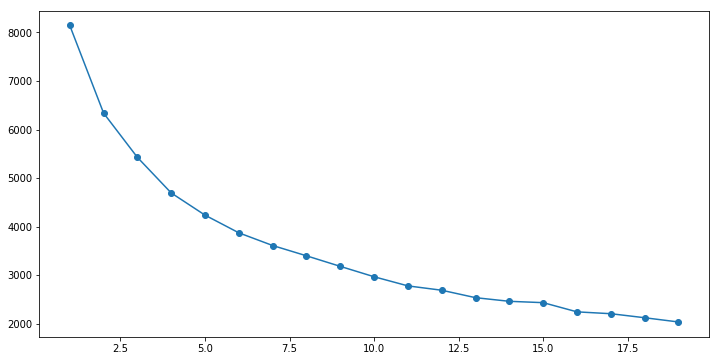

In [260]:
#Identify the appropriate clusters with result from above 

from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [261]:
# We could see the bend at 10, so let us create 4 custers

kmeans = KMeans(n_clusters=10, n_init = 5, random_state=12345)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [262]:
#Check for no of values in each cluster and centers for each variables

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[106  82 126  66 138  89 147  67 123  74]


In [263]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )
centroid_df.transpose()

,0,1,2,3,4,5,6,7,8,9
cement,-0.847363,0.415220,0.467924,-0.195729,-0.656163,0.336975,-0.857027,1.366956,-0.088084,1.561122
slag,1.088337,-0.933815,1.002124,-0.561722,-0.746112,-0.933815,1.232794,0.274916,-0.880601,-0.449162
ash,0.909211,-0.847770,-0.712762,0.953392,1.249299,-0.847770,-0.847770,-0.604179,1.049129,-0.822534
water,0.307684,0.677360,-0.361961,-0.629725,-1.157986,0.865251,0.784906,-1.825240,0.411997,0.514052
superplastic,0.842870,-1.162371,0.817275,0.648854,0.759576,-1.188927,-1.141793,0.519081,0.635509,-1.134328
coarseagg,-0.906749,1.255244,-0.046183,0.339382,0.741143,-0.117898,-0.069862,-1.101282,-0.464207,0.350992
fineagg,-0.433427,0.065399,-0.430630,0.356443,0.570177,0.698536,-0.212990,1.097685,0.160598,-1.777412
age,0.224194,-0.380924,0.037323,2.288723,-0.399166,-0.235512,-0.335940,-0.086072,-0.112171,-0.044523


Group 2 has highest values for **cement**  while 9th has lowest.

Group 6 has maximum  number of **slag** and 3 forms of lower **slag** values

Group 7 has highest value for **ash**  and 1,6,9 has lowest.

Group 4 has highest value for  **water** and group has lowest.

Group 1 has highest value for **superplastic** and group 1 has lowest.

Group 8 has highest value for **coarseagg** and group 2 has lowest.

Group 2 has highest value for **fineagg** and group 8 has lowest.

Group 5 has highest value for **age** and group 1 has lowest.

In [264]:
# Add cluster number to original data
#Assign the groups created above to data frame and study the characteristics for each group.
predictions = kmeans.predict(X_scaled)
predictions
df_no_out2["group"] = predictions
df_no_out2['group'] = df_no_out2['group'].astype('category')
df_no_out2.dtypes

cement           float64
slag             float64
ash              float64
water            float64
superplastic     float64
coarseagg        float64
fineagg          float64
age                int64
strength         float64
group           category
dtype: object

In [265]:
# Let us now remove irrelevant column

concrete_new = df_no_out2.drop(['group'], axis =1)

concrete_new.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,142.95,0.0,185.0,0.0,971.8,748.5,28,29.89
1,168.9,42.20,124.3,158.3,6.4,1080.8,796.2,14,23.51
2,250.0,0.00,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.00,0.0,185.0,0.0,932.0,670.0,28,45.85
4,154.8,142.95,0.0,185.0,9.1,1047.4,696.7,28,18.29


**Deliverable -3  (create the model ) a. Obtain feature importance for the individual features using multiple methods and present your findings**

**1)Filter Method :** Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable **Strength**. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.
The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

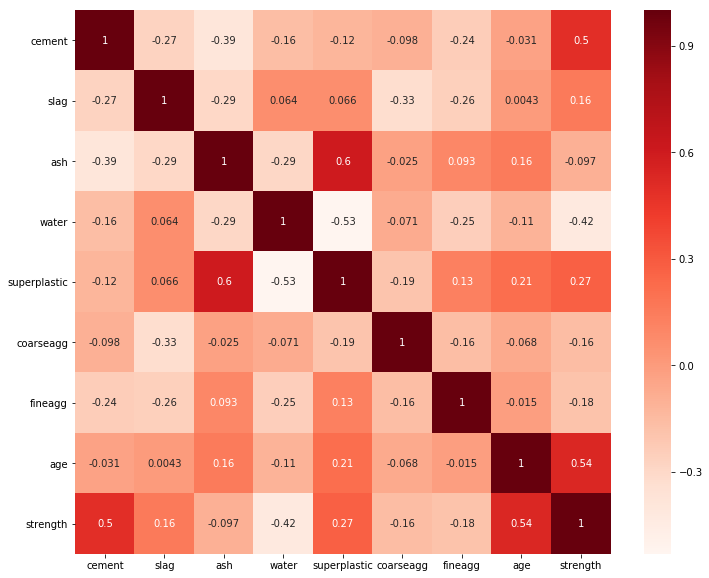

In [266]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = concrete_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [267]:
#Correlation with output variable
cor_target = abs(cor["strength"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

age         0.538682
strength    1.000000
Name: strength, dtype: float64

Outcome - By filter method using pearson's correlation it shows that only **age** being most important feature in the dataset which is contributing to the given ouput value.

2) **Embedded Method:**

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.Here we will do feature selection using Lasso regularization.** 

In [268]:
#copy all predictors variables to dataframe a ,since strength is dependent variable(target) drop it. 
a = concrete_new  .drop('strength',axis = 1)

#copy the ' strength 'column to dataframe b. This is the target column
b =  concrete_new['strength']

In [269]:
from sklearn.linear_model import LassoCV

In [270]:
reg = LassoCV()
reg.fit(a, b)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(a,b))
coef = pd.Series(reg.coef_, index = a.columns)

Best alpha using built-in LassoCV: 0.864721
Best score using built-in LassoCV: 0.734721


Text(0.5, 1.0, 'Feature importance using Lasso Model')

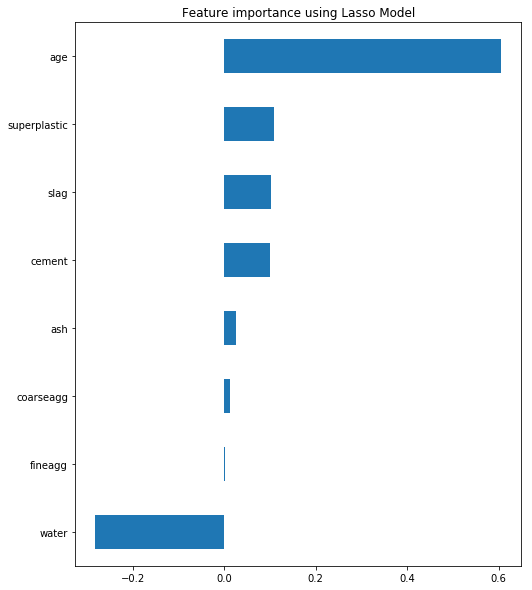

In [271]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


**Outcome -**

**Approach 1** - As we can see only **age** has correlation greater than 0.5.

**Approach 2** - Here Lasso model has taken all the features except coarseagg ,fineagg.


**4. Deliverable -4 (Tuning the model)::** 

**a. Algorithms that you think will be suitable for this project**

**b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit .**

**c. Model performance range at 95% confidence level .**

a)Algorithms that you think will be suitable for this project : 

- Linear Regression (with and without polynomial)
- DecisionTree Regression
- Support vector Regression
- Polynomial model(which i have already used for deliverable2).

In [272]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled.shape

(1018, 8)

### Decision Tree Regression:

In [393]:
X_train ,X_test,y_train ,y_test = train_test_split(X_scaled,y, test_size=0.30, random_state=1)

In [394]:

# Descisiontree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = X.columns[0:9]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.46237286 0.         0.         0.08119844 0.         0.
 0.         0.4564287 ]
Index(['cement', 'age', 'water', 'fineagg', 'coarseagg', 'superplastic', 'ash',
       'slag'],
      dtype='object') [0.46237286 0.         0.         0.08119844 0.         0.
 0.         0.4564287 ]


In [395]:
predictions2 = regressor.predict(X_test)


In [396]:
print(metrics.mean_absolute_error(y_test, predictions2))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions2)))

7.832435166648255
10.100988190452


In [415]:
#Support vector regressor


svm = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
svm.fit(X_train, y_train) 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [398]:
predictions3 = svm.predict(X_test)


In [399]:
print(metrics.mean_absolute_error(y_test, predictions3))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions3)))

6.9734537844428015
8.944024358094794


###  Now applying PRINCIPAL COMPONENT ANALYSIS to improve the performance of the model

In [500]:
#Splitting the data into train and test .
#copy all predictors variables to dataframe X ,since strength is dependent variable(target) drop it. 
M =  concrete_new.drop('strength',axis = 1)

#copy the ' strength 'column to dataframe y. This is the target column
N =  concrete_new['strength']


In [501]:
#scaling of taining data

X_scaled = sc.fit_transform(M)

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=1)

In [503]:
covMatrix = np.cov(X_train,rowvar=False)

In [504]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covMatrix)
eig_val

array([2.19093788, 0.06736389, 0.27192793, 1.41134961, 1.26008652,
       0.78375682, 1.06249389, 0.92277586])

In [505]:
eig_vec


array([[-0.17548375,  0.48850745,  0.1323495 ,  0.20152356,  0.80331047,
        -0.15922384, -0.04088696,  0.01030072],
       [-0.16368647,  0.48087851, -0.01821146, -0.69873533, -0.08809433,
         0.28965145, -0.01494747, -0.40189287],
       [ 0.54957633,  0.50897154, -0.3491058 ,  0.02358862, -0.22253634,
        -0.47390636,  0.19694626,  0.05987533],
       [-0.45316271,  0.2209709 ,  0.49366948, -0.12585632, -0.36071594,
        -0.38979814,  0.10442497,  0.43966225],
       [ 0.56503514, -0.17117154,  0.71627271, -0.22021746,  0.14385047,
        -0.13574422,  0.06332204, -0.21625018],
       [-0.04855857,  0.2873222 ,  0.2633379 ,  0.57124873, -0.27383563,
         0.35843244,  0.44773077, -0.33984326],
       [ 0.27265172,  0.33118394,  0.18246544,  0.17345085, -0.17833995,
         0.38411504, -0.68762308,  0.31689809],
       [ 0.19763603,  0.02645017, -0.02967249, -0.22328215,  0.19952247,
         0.46880199,  0.52068647,  0.61547225]])

In [506]:
total_var = eig_val.sum()
sort_var = np.sort(eig_val)
sort_var[:] = sort_var[::-1]
sort_var

array([2.19093788, 1.41134961, 1.26008652, 1.06249389, 0.92277586,
       0.78375682, 0.27192793, 0.06736389])

#### Calculation of the Cumulative Explained Variance for each attribute

In [507]:
explained_variance = [0]
cumulative_var = [0]
cumulative_var_arr = [0]
id = np.linspace(1,8,num=8, dtype='int64')
for id, var in zip(id, sort_var):
    e_var = var/total_var * 100.0
    explained_variance.append(e_var)
    cumulative_var = cumulative_var + e_var
    cumulative_var_arr.append(cumulative_var)
    print('The cumulative explained variance until attribute %1.0f is %3.2f' %(id, cumulative_var))

The cumulative explained variance until attribute 1 is 27.49
The cumulative explained variance until attribute 2 is 45.19
The cumulative explained variance until attribute 3 is 61.00
The cumulative explained variance until attribute 4 is 74.33
The cumulative explained variance until attribute 5 is 85.91
The cumulative explained variance until attribute 6 is 95.74
The cumulative explained variance until attribute 7 is 99.15
The cumulative explained variance until attribute 8 is 100.00


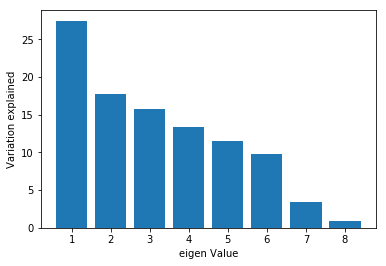

In [508]:
#Barplot for explained variance for all attributes

plt.bar(list(range(1,9)),explained_variance[1:], align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [509]:
#sklearn package for PCA
from sklearn.decomposition import PCA
#Fitting PCA components

pca = PCA(n_components=6)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [510]:
#Transforming the training & testing sets separately

X_train_sc_pca = pca.transform(X_train)

In [511]:
X_test_sc_pca = pca.transform(X_test)

In [512]:
#number of observations in pca's training and test set

print("PCA Training data", X_train_sc_pca.shape)
print("PCA Test Data",X_test_sc_pca.shape)

PCA Training data (712, 6)
PCA Test Data (306, 6)


In [513]:
pca.explained_variance_ratio_ 

array([0.27314035, 0.18121915, 0.15675304, 0.13657835, 0.11319518,
       0.09693676])

In [514]:
Final_df = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6'])
Final_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.203674,0.333761,0.746083,-0.037453,-0.025603,0.189667
1,-0.117162,-0.724747,0.081618,0.090907,0.305120,-0.342249
2,0.545658,0.047181,-0.249897,0.215853,0.013432,0.462596
3,-0.439095,-0.188311,-0.387802,0.052175,-0.360408,0.438281
4,0.570401,-0.155587,0.198238,0.115026,0.206970,0.112697
5,-0.078242,0.521900,-0.333786,0.445701,0.229640,-0.458763
6,0.272156,0.116464,-0.194762,-0.762338,-0.219080,-0.314321
7,0.220670,-0.124529,0.187660,0.384681,-0.795365,-0.344739


### Final model selection - SMV using gridsearch(hyperparameter tunning).

In [515]:
#instantiate support vector classifier
svc = SVR()

In [483]:
#assigning C values and kernel  to a variable named grid 

grid={"C":[0.01, 0.05, 0.5, 1,10], 'kernel': ['linear', 'rbf']}

In [489]:
#instantiate GridsearchCV with support vector classifier

svr_cv = GridSearchCV(svc, grid, cv=5, scoring = 'r2')

In [516]:
# tune the traning data with pca attributes

svr_cv.fit(X_train_sc_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1, 10], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [517]:
#printing the optimum values of hyperparameters after the tuning process
print("tuned hpyerparameters :(best parameters) ",svr_cv.best_params_)


#printing the mean cross validated score of the best estimator 
print("accuracy :",svr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'kernel': 'rbf'}
accuracy : 0.7830580189522762


In [518]:
#Checking accuracy score on the Test Set

predictions = svc_cv.predict(X_test_sc_pca)

In [519]:
print(metrics.mean_absolute_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

5.234710198807107
7.100708285366595


**PCA With hyperparameter tunning using SVR is giving the most optimul Result** 

### Conclusion :

 **Insights** 
 
 - The main components of concrete building is **cement* , **sand** and **aggregate**.And the Ideal ratio is M20.
 
 - Ash being the least important component.
 
 - Target variable is strength ,an ideal strength ranges between 75 and 81.75.
 
 - cement ranges from 275 to 540 and the ideal quantity of cement would be 362.6 and above.
 
 - Slag values ranges from 0 to 282.8 ,and the ideal would be **189**
 
 - Ash has zero value in most of the observations and it is further proved by Lasso and feature importance plot.
 
 - Water value ranges from 144.7 to 183.8 and as per strength value an ideal water quantity would be 164.9.
 
 - coarseagg value ranges from 830 to 1130 and ideal would be 942.7 to 1130 and above.
 
 - Minimum age is 1 ,in which cement is 385 ,no slag,no ash,no superpalstic ,water is 186,coarse is 966 and strengh is 6.22.
 
 - There are  197 observations out of total 1030 ,which has strength less than 20 or we can consider it as **weak concrete piece**.
 
 - Slag and Plastic are important factors to be considered in terms of authenticity and life of a concrete.(referring to the least aged observation - 833)
 
 